In [1]:
from NN_Thesis.nn_classes import *
from NN_Thesis.trainer import *
from NN_Thesis.adapters import *
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
from torch import optim


from torchvision.transforms import transforms
import numpy as np
import os
from PIL import Image
import random

from matplotlib import pyplot as plt

import wandb


In [2]:
from NN_Thesis.models import *

In [3]:
torch.manual_seed(123)
random.seed(123)
batch_size = 16


from NN_Thesis.dataset import cifar_100_split
from torch.utils.data import DataLoader

data_path = 'data/cifar-100/cifar-80/'

train_data = cifar_100_split(data_path,train = True)
test_data = cifar_100_split(data_path,train = False)


def normalize_channels(data):
    #We have a nxCxWxH array
    d = data
    d = torch.flatten(data,2,-1).to(dtype = torch.float32)
    print(d.shape)
    mean= torch.mean(d,dim = [0,2])
    std = torch.std(d,dim = [0,2])
    return mean,std


mean,std = normalize_channels(train_data.data)

train_transform = transforms.Compose([
    # transforms.ToTensor(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean, std),
])


test_transform = transforms.Compose([
    # transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train_data.transform = train_transform
test_data.transform = test_transform

mean,std

torch.Size([40000, 3, 1024])


(tensor([0.5034, 0.4852, 0.4427]), tensor([0.2684, 0.2562, 0.2766]))

In [16]:
im = train_data[0][0]
im.shape

torch.mul(im,mean)

RuntimeError: The size of tensor a (32) must match the size of tensor b (3) at non-singleton dimension 2

streetcar


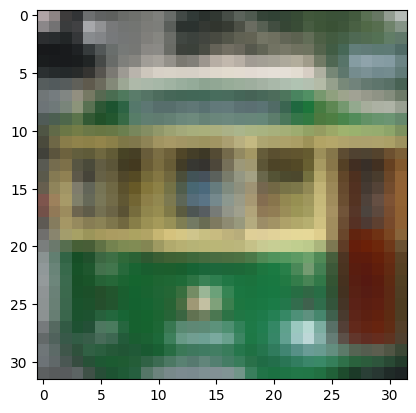

In [23]:
def plotImage(dataset,idx):
    img,label = dataset[idx]
    img = (img*255).to(torch.uint8).numpy()
    img = np.moveaxis(img,0,-1)
    print(dataset.classes[label])
    plt.imshow(img)


to_plot = cifar_100_split(data_path,train = False)
idx = random.randint(0,len(to_plot))
plotImage(to_plot,idx)

In [4]:
train_dataloader = DataLoader(train_data,batch_size =64,shuffle = True)

x = train_data[0]
img,label = next(iter(train_dataloader))

img.shape


torch.Size([64, 3, 32, 32])

# Code For Initial Cifar5 Training

In [4]:
BNN_resnet18 = resnet_binary(num_classes = 80 , depth = 18, dataset = 'cifar10')

BNN_resnet18

ResNet_cifar10(
  (conv1): BinarizeConv2d(3, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tanh1): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
  (tanh2): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (tanh1): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
      (conv2): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (tanh2): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
      (bn2): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [4]:
train_dataloader = DataLoader(train_data,batch_size =64,shuffle = True,num_workers=4,pin_memory=True)
test_dataloader = DataLoader(test_data,batch_size =64,num_workers=4,pin_memory=True)

classes = tuple(train_data.classes)

BNN_resnet18 = resnet_binary(num_classes = 80 , depth = 18, dataset = 'cifar10')
resnet18 = resnet(num_classes = 80 , depth = 18, dataset = 'cifar10')


BNN_trainer = Trainer(BNN_resnet18,model_name = 'Baseline_BNN_Resnet18',project_name = 'Cifar80-20_2023',classes = classes,seed = 123,binarise = True)
resnet_trainer =Trainer(resnet18,model_name = 'Baseline_Resnet18',project_name='Cifar80-20_2023',classes = classes,seed = 123)

#Set Training Params
for trainer in [resnet_trainer]:
    trainer.lr = 1e-3
    trainer.set_optimizer(optimizer=torch.optim.Adam)
    trainer.set_scheduler(None)
    trainer.epochs =200
    trainer.epoch_chkpts = []
    trainer.start_epoch = 0
    trainer.T_max = 200
    trainer.train(train_dataloader,test_dataloader)

Optimizer Set to New: {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]}]}
No lr scheduler


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: johnny_suu. Use `wandb login --relogin` to force relogin


start
Project Name: Cifar80-20_2023, Run Name Baseline_Resnet18 


Run Start : 2023-03-06 10-38-32
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 200
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet.ResNet_cifar10'>
binerised_training : False
Number of Elements : 179808
Initial accuracy:
Test Accuracy : 1.2%, Test Loss: 4.4847590995788575
best_acc.pth saved!
Test Accuracy : 1.1%, Test Loss: 4.47257124710083
epoch: 1 average loss: 3.639
Test Accuracy : 14.9%, Test Loss: 3.382557922363281
best_acc.pth saved!
Epoch Time (Training + Test) = 19.13 seconds
epoch: 2 average loss: 3.140
Test Accuracy : 24.1%, Test Loss: 2.9394453716278077
best_acc.pth saved!
Epoch Time (Tr

In [5]:
train_dataloader = DataLoader(train_data,batch_size =64,shuffle = True,num_workers=4,pin_memory=True)
test_dataloader = DataLoader(test_data,batch_size =64,num_workers=4,pin_memory=True)

classes = tuple(train_data.classes)

# BNN_resnet18 = ResNet_cifar10(num_classes = 80 , depth = 18, inflate =)
# # resnet18 = resnet(num_classes = 80 , depth = 18, dataset = 'cifar10')



# resnet_trainer =Trainer(resnet18,model_name = 'Baseline_Resnet18',project_name='Cifar80-20',classes = classes,seed = 123)

#Set Training Params
for i in range(1,6):
    BNN_resnet18 = ResNet_cifar10(num_classes = 80 , depth = 18, inflate =i)
    trainer = Trainer(BNN_resnet18,model_name = f'Baseline_BNN_Resnet18_inflate_{i}',project_name = 'Cifar80-20',classes = classes,seed = 123,binarise = True)
    trainer.tags = ['BNN Inflation Test',f'inflate {i}']
    trainer.lr = 0.2
    trainer.epochs = 200
    trainer.set_optimizer()
    trainer.set_scheduler(optim.lr_scheduler.CosineAnnealingLR,T_max = trainer.epochs)
    trainer.train(train_dataloader,test_dataloader,group ='BNN Inflation Test')

Using Default (SGD) Optimizer
Scheduler Set {'T_max': 200, 'eta_min': 0, 'base_lrs': [0.2], 'last_epoch': 0, '_step_count': 1, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.2]}


start
Project Name: Cifar80-20, Run Name Baseline_BNN_Resnet18_inflate_1 


Run Start : 2022-10-23 09-57-19
start_epoch : 0
initial_lr : 0.2
batch_size : 32
epochs : 200
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet_binary.ResNet_cifar10'>
binerised_training : True
Number of Elements : 180096
Initial accuracy:
Test Accuracy : 1.3%, Test Loss: 19.607304489135743
best_acc.pth saved!
Test Accuracy : 1.2%, Test Loss: 19.53532987976074
epoch: 1 average loss: 4.201
Test Accuracy : 6.8%, Test Loss: 4.003477426528931
best_acc.pth saved!
Epoch Time (Training + Test) = 15.18 seconds
epoch: 2 average loss: 3.913
Test Accuracy : 8.3%, Test Loss: 3.8278928184509278
best_acc.pth saved!
Epoch Time (Training + Test) = 15.18 seconds
epoch: 3

Current Best Acc,▁▃▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▅▅▄▄▃▄▃▇▄▄▅▃▁▃▄▂▂▄▂▂█▅▄▄▄▄▃▃▁▄▂▂▆▅▂▂▂▂▂▁
lr,███████▇▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
test_accuracy,▁▃▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▆▇▇▆▇▇▆▇▇▇▇█▇▇▇████████
test_loss,█▆▅▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
training_loss,█▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.30912
Current Best Acc,0.30912
Total Time (hours),1.64465
epoch,200


start
Project Name: Cifar80-20, Run Name Baseline_BNN_Resnet18_inflate_2 


Run Start : 2022-10-23 10-47-02
start_epoch : 0
initial_lr : 0.2
batch_size : 32
epochs : 200
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet_binary.ResNet_cifar10'>
binerised_training : True
Number of Elements : 706064
Initial accuracy:
Test Accuracy : 1.1%, Test Loss: 28.011135665893555
best_acc.pth saved!
Test Accuracy : 1.2%, Test Loss: 27.81398631286621
best_acc.pth saved!
epoch: 1 average loss: 4.104
Test Accuracy : 7.9%, Test Loss: 3.9044494762420654
best_acc.pth saved!
Epoch Time (Training + Test) = 18.35 seconds
epoch: 2 average loss: 3.842
Test Accuracy : 9.1%, Test Loss: 3.7446407947540283
best_acc.pth saved!
Epoch Time (Training + Test) = 1

Current Best Acc,▁▂▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▅▅▅█▃▂▃▂▂▃▂▄▃▁▁▁▃▃▂▃▂▄▂▂▇▃▂▁▁▃▃▂▂▄▃▄▂▆▂▁
lr,███████▇▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
test_accuracy,▁▂▃▄▄▄▅▅▅▅▅▆▆▆▆▆▇▆▇▇▆▇▇▇▇▇▇▇▇▇▇█████████
test_loss,█▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▃▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁
training_loss,█▆▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.47487
Current Best Acc,0.47487
Total Time (hours),2.03373
epoch,200


start
Project Name: Cifar80-20, Run Name Baseline_BNN_Resnet18_inflate_3 


Run Start : 2022-10-23 11-48-28
start_epoch : 0
initial_lr : 0.2
batch_size : 32
epochs : 200
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet_binary.ResNet_cifar10'>
binerised_training : True
Number of Elements : 1578144
Initial accuracy:
Test Accuracy : 1.3%, Test Loss: 33.51741357421875
best_acc.pth saved!
Test Accuracy : 1.2%, Test Loss: 33.42912989807129
epoch: 1 average loss: 4.072
Test Accuracy : 8.8%, Test Loss: 3.8390874557495116
best_acc.pth saved!
Epoch Time (Training + Test) = 22.70 seconds
epoch: 2 average loss: 3.780
Test Accuracy : 11.7%, Test Loss: 3.6329634017944334
best_acc.pth saved!
Epoch Time (Training + Test) = 22.80 seconds
epoch:

Current Best Acc,▁▂▃▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▅▃▁▃▂▃▃▃▃▃▂▅▆█▅▃▃▄▃▃▂▃▅▂▃▄▂▄▄▇▃▁▂▃▄▃▁▂▅▃
lr,███████▇▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
test_accuracy,▁▂▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████
test_loss,█▆▆▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.54125
Current Best Acc,0.54125
Total Time (hours),2.51852
epoch,200


start
Project Name: Cifar80-20, Run Name Baseline_BNN_Resnet18_inflate_4 


Run Start : 2022-10-23 13-04-29
start_epoch : 0
initial_lr : 0.2
batch_size : 32
epochs : 200
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet_binary.ResNet_cifar10'>
binerised_training : True
Number of Elements : 2796336
Initial accuracy:
Test Accuracy : 1.3%, Test Loss: 38.64717101745605
best_acc.pth saved!
Test Accuracy : 1.4%, Test Loss: 38.78788375854492
best_acc.pth saved!
epoch: 1 average loss: 4.057
Test Accuracy : 9.0%, Test Loss: 3.833388271331787
best_acc.pth saved!
Epoch Time (Training + Test) = 26.94 seconds
epoch: 2 average loss: 3.775
Test Accuracy : 10.5%, Test Loss: 3.669631546020508
best_acc.pth saved!
Epoch Time (Training + Test) = 26

Current Best Acc,▁▂▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆█▅▇
lr,███████▇▇▇▇▇▇▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
test_accuracy,▁▂▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇██▇████████████
test_loss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▆▆▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.57663
Current Best Acc,0.57663
Total Time (hours),3.00448
epoch,200


start
Project Name: Cifar80-20, Run Name Baseline_BNN_Resnet18_inflate_5 


Run Start : 2022-10-23 14-35-04
start_epoch : 0
initial_lr : 0.2
batch_size : 32
epochs : 200
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.2
    lr: 0.2
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet_binary.ResNet_cifar10'>
binerised_training : True
Number of Elements : 4360640
Initial accuracy:
Test Accuracy : 1.2%, Test Loss: 43.934367578125
best_acc.pth saved!
Test Accuracy : 1.2%, Test Loss: 44.11837606811523
epoch: 1 average loss: 4.050
Test Accuracy : 9.3%, Test Loss: 3.8131789264678955
best_acc.pth saved!
Epoch Time (Training + Test) = 36.42 seconds
epoch: 2 average loss: 3.735
Test Accuracy : 11.8%, Test Loss: 3.6042515964508057
best_acc.pth saved!
Epoch Time (Training + Test) = 36.53 seconds
epoch: 3

In [ ]:
def normalize_channels(data):
    #We have a nxCxWxH array
    d = data
    d = torch.flatten(data,2,-1).to(dtype = torch.float32)/255
    mean= torch.mean(d,dim = [0,2])
    std = torch.std(d,dim = [0,2])
    return mean,std


# Code For Finetuning

In [5]:
from NN_Thesis.dataset import cifar_100_split
from torch.utils.data import DataLoader

data_path = 'data/cifar-100/cifar-20/'

train_data20 = cifar_100_split(data_path,train = True)
test_data20 = cifar_100_split(data_path,train = False)


def normalize_channels(data):
    #We have a nxCxWxH array
    d = data
    d = torch.flatten(data,2,-1).to(dtype = torch.float32)
    print(d.shape)
    mean= torch.mean(d,dim = [0,2])
    std = torch.std(d,dim = [0,2])
    return mean,std


mean,std = normalize_channels(train_data20.data)

train_transform = transforms.Compose([
    # transforms.ToTensor(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean, std),
])


test_transform = transforms.Compose([
    # transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train_data20.transform = train_transform
test_data20.transform = test_transform

mean,std
train20_loader = DataLoader(train_data20,batch_size=64,shuffle=True)
test20_loader = DataLoader(test_data20,batch_size=64,shuffle=True)
classes = train_data20.classes
classes

torch.Size([10000, 3, 1024])


['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle']

## Feature Extraction

In [6]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

PATH = '.\SavedModels\Cifar80-20\Baseline_BNN_Resnet18_inflate_5_2022-10-23 14-35-04\Baseline_BNN_Resnet18_inflate_5_best_acc.pth'
BinCifar5_state_dict = torch.load(PATH,map_location= device)

feat_extr_model = resnet18_adapt(num_classes= 80)
feat_extr_model.load_state_dict(BinCifar5_state_dict)
feat_extr_model.freeze()
feat_extr_model.fc = BinarizeLinear(64*5,20)
feat_extr_model.bn3 = nn.BatchNorm1d(20)


feat_ex = Trainer(feat_extr_model,model_name = 'feat_extract',project_name = 'Cifar80-20_2023',classes = classes,seed = 123,binarise = True)
feat_ex.lr = 1e-3
feat_ex.epochs = 75
feat_ex.set_optimizer(torch.optim.Adam)
feat_ex.set_scheduler(None)
feat_ex.train(train20_loader,test20_loader)




Optimizer Set to New: {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}]}
No lr scheduler


Current Best Acc,▁▄▆▆▇▇▇▇▇▇██████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),█▂▂▂▄▁▂▁▆▅▄▆▄▄▃▃▃▂▃▃▁▃▁▂▄▃▄▂▅▂▁▁▄▄▃▂▂▂▃▃
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▄▆▆▇▇▇▇█▇██████████████████████████████
test_loss,█▅▃▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
training_loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.64025
Current Best Acc,0.64025
Total Time (hours),1.9957
epoch,200


start
Project Name: Cifar80-20_2023, Run Name feat_extract 


Run Start : 2023-03-06 11-38-49
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4341260
Initial accuracy:
Test Accuracy : 4.4%, Test Loss: 34.356216102648695
best_acc.pth saved!
Test Accuracy : 4.9%, Test Loss: 33.88520532846451
best_acc.pth saved!
epoch: 1 average loss: 2.040
Test Accuracy : 56.0%, Test Loss: 1.6127359345555305
best_acc.pth saved!
Epoch Time (Training + Test) = 4.93 seconds
epoch: 2 average loss: 1.624
Test Accuracy : 58.6%, Test Loss: 1.49849097058177
best_acc.pth saved!
Epoc

In [7]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


PATH = 'SavedModels\Cifar80-20_2023\Baseline_BNN_Resnet18_2023-03-05 19-23-30\Baseline_BNN_Resnet18_best_acc.pth'
BinCifar5_state_dict = torch.load(PATH,map_location= device)


finetune_model = resnet18_adapt(num_classes= 80)
finetune_model.load_state_dict(BinCifar5_state_dict)
finetune_model.freeze()
finetune_model.fc = BinarizeLinear(64*5,20)
finetune_model.bn3 = nn.BatchNorm1d(20)

finetune = Trainer(finetune_model,model_name = 'Full_finetune',project_name='Cifar80-20_2023',classes = classes,seed = 123,binarise = True)
finetune.tags = ['finetune','full ft']
m = finetune.model
# m.to(finetune.device)
# for layer in [m.fc,m.bn3,m.bn3]:
#     for p in layer.parameters():
#         p.requires_grad = True
#     layer.train()
# finetune.train(train59_loader,test59_loader)


#FineTune
finetune.epochs = 100
finetune.lr = 1e-3
finetune.set_optimizer(optim.Adam)
finetune.set_scheduler(None)
m.unfreeze()
finetune.train(train20_loader,test20_loader)

Optimizer Set to New: {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}]}
No lr scheduler


Current Best Acc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁█▇▇▇▇▇▇▆▇▇▇▆▆▆▇▇▆▆▇▆▆▇█▆▆▇▆▆▆▆▆▆▇▆▆▆▆▆▇
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇██████████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.6215
Current Best Acc,0.6215
Total Time (hours),0.20201
epoch,75


start
Project Name: Cifar80-20_2023, Run Name Full_finetune 


Run Start : 2023-03-06 11-45-07
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4341260
Initial accuracy:
Test Accuracy : 5.3%, Test Loss: 33.16197556902649
best_acc.pth saved!
Test Accuracy : 5.1%, Test Loss: 33.61416697502136
epoch: 1 average loss: 1.991
Test Accuracy : 60.4%, Test Loss: 1.5300423204898834
best_acc.pth saved!
Epoch Time (Training + Test) = 10.64 seconds
epoch: 2 average loss: 1.540
Test Accuracy : 63.6%, Test Loss: 1.3789079934358597
best_acc.pth saved!
Epoch Time (Training

## Baseline Resnet FT

In [9]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


PATH = '.\SavedModels\Cifar80-20\Baseline_Resnet18_2022-10-25 09-07-51\Baseline_Resnet18_best_acc.pth'
Cifar5_state_dict = torch.load(PATH,map_location= device)


finetune_model = resnet(num_classes = 80 , depth = 18, dataset = 'cifar10')
finetune_model.load_state_dict(Cifar5_state_dict)

finetune_model.fc = nn.Linear(64,20)
# finetune_model.bn3 = nn.BatchNorm1d(20)

finetune = Trainer(finetune_model,model_name = 'Non BNN Full_finetune',project_name='Cifar80-20',classes = classes,seed = 123,binarise = False)
finetune.tags = ['finetune','full ft']
m = finetune.model
# m.to(finetune.device)
# for layer in [m.fc,m.bn3,m.bn3]:
#     for p in layer.parameters():
#         p.requires_grad = True
#     layer.train()
# finetune.train(train59_loader,test59_loader)


#FineTune
finetune.epochs = 100
finetune.lr = 0.1
finetune.set_optimizer()
finetune.set_scheduler(optim.lr_scheduler.CosineAnnealingLR,T_max = finetune.epochs)
# m.unfreeze()
finetune.train(train20_loader,test20_loader,group = 'Adapter Location Test')

Using Default (SGD) Optimizer
Scheduler Set {'T_max': 100, 'eta_min': 0, 'base_lrs': [0.1], 'last_epoch': 0, '_step_count': 1, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.1]}


start
Project Name: Cifar80-20, Run Name Non BNN Full_finetune 


Run Start : 2022-10-25 09-15-00
start_epoch : 0
initial_lr : 0.1
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.1
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.models.resnet.ResNet_cifar10'>
binerised_training : False
Number of Elements : 175908
Initial accuracy:
Test Accuracy : 5.5%, Test Loss: 3.0209460319227475
best_acc.pth saved!
Test Accuracy : 5.9%, Test Loss: 3.0360041186213493
best_acc.pth saved!
epoch: 1 average loss: 1.407
Test Accuracy : 64.0%, Test Loss: 1.1786473002284765
best_acc.pth saved!
Epoch Time (Training + Test) = 2.89 seconds
epoch: 2 average loss: 1.026
Test Accuracy : 63.7%, Test Loss: 1.103893518447876
Epoch Time (Training + Test) = 2.91 seconds
epoch: 3 average loss: 

In [17]:
a = finetune.get_param_info()

z = finetune.model
element_info = dict()
for layer in z.parameters():
    if str(layer.dtype) not in element_info.keys():
        element_info[str(layer.dtype)] = layer.numel()
    else:
        element_info[str(layer.dtype)] += layer.numel()

element_info[str(layer.dtype)]

4336415

# Adapter FineTune

## Single Autoencoder After bn2 

In [8]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
Bin_state_dict = torch.load('BinaryCifar5_best_acc.pth',map_location= device)

bottleneck = autoencoder_adapter(320,200)
adapt_fine = resnet18_adapt(num_classes=5)
adapt_fine.load_state_dict(Bin_state_dict)
adapt_fine.freeze()
adapt_fine.add_adapter(after = 'bn2',adapter = bottleneck)

adapt_fine_trainer = adapter_Trainer(model = adapt_fine,seed = 123,model_name = 'adapt_fine',project_name='Cifar5',classes = classes,binarise= True)
for trainer in [adapt_fine_trainer]:
    m = trainer.model
    m.to(trainer.device)
    for layer in [m.fc,m.bn3,m.bn3]:
        for p in layer.parameters():
            p.requires_grad = True
        layer.train()
    trainer.lr = 0.01
    trainer.batch_size = 128
    trainer.epochs =70
    trainer.epoch_chkpts = []
    trainer.start_epoch = 0
    trainer.T_max = 70
    # trainer.scheduler.T_max= trainer.T_max
    # trainer.optimizer = optim.Adam(trainer.model.parameters(), lr=trainer.lr)
    trainer.scheduler = optim.lr_scheduler.CosineAnnealingLR(trainer.optimizer, T_max= trainer.epochs)
    trainer.train(train59_loader,test59_loader)

start
start_epoch : 0
lr : 0.01
batch_size : 128
epochs : 70
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.1
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
epoch: 1 average loss: 1.388 Epoch Time 0.14 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\adapt_fine_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\adapt_fine_latest.pth saved!
Overall Accuracy : 44.1%
best_acc.pth saved!
epoch: 2 average loss: 1.144 Epoch Time 0.28 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\adapt_fine_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\adapt_fine_latest.pth saved!
Overall Accuracy : 52.3%
best_acc.pth saved!
epoch: 3 average loss: 1.068 Epoch Time 0.42 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\adapt_fine_best_loss.pth saved!
c:\Users\John Su\Downloads\Sydn

## 2 Adapters


In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
PATH = 'SavedModels\Cifar80-20_2023\Baseline_BNN_Resnet18_2023-03-05 19-23-30\Baseline_BNN_Resnet18_best_acc.pth'
Bin_state_dict = torch.load(PATH,map_location= device)



input_channels = [80,160,320]
down_channels = [2,5,10]
layers = ['layer1','layer2','layer3']


for after_layer,input_channel in zip(layers,input_channels):
    for down_channel in down_channels:
        down = input_channel//down_channel
        conv_bn = conv_channel_adapter2(input_channel,down,kernel = 1, padding= 0)
        adapt_fine2 = resnet18_adapt(num_classes=80)
        adapt_fine2.load_state_dict(Bin_state_dict)
        adapt_fine2.fc = BinarizeLinear(64*5,20)
        adapt_fine2.bn3 = nn.BatchNorm1d(20)
        adapt_fine2.freeze()
        # adapt_fine2.add_adapter(after = 'bn2',adapter = bottleneck)
        adapt_fine2.add_adapter(after = after_layer,adapter = conv_bn)
        trainer = Trainer(model = adapt_fine2,seed = 123,model_name = f'adapter_{after_layer}_conv_channel2_{down}',project_name = 'Cifar80-20_adapt_bn_2023',classes = classes,binarise= True)
        m = trainer.model
        m.to(trainer.device)
        for layer in [m.fc,m.bn3]:
            for p in layer.parameters():
                p.requires_grad = True
            layer.train()
        trainer.lr = 1e-3
        trainer.batch_size = 64
        trainer.epochs =75
        trainer.epoch_chkpts = []
        trainer.start_epoch = 0
        trainer.set_scheduler(None)
        trainer.set_optimizer(torch.optim.Adam)
        trainer.train(train20_loader,test20_loader)

No lr scheduler
Optimizer Set to New: {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]}]}


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: johnny_suu. Use `wandb login --relogin` to force relogin


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer1_conv_channel2_40 


Run Start : 2023-03-06 18-08-40
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4347900
Initial accuracy:
Test Accuracy : 6.0%, Test Loss: 29.37076383943011
best_acc.pth saved!
Test Accuracy : 6.0%, Test Loss: 28.905723690986633
best_acc.pth saved!
epoch: 1 average loss: 1.975
Test Accuracy : 60.4%, Test Loss: 1.5366382002830505
best_acc.pth saved!
Epoch Time (Training + Test) = 5.97 seconds
epoch: 2 average loss: 1.552
Test Accuracy : 64.0%, Test Loss: 1.37231006473

Current Best Acc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▂▂▁▅▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇██▇███████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.6795
Current Best Acc,0.6795
Total Time (hours),0.2878
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer1_conv_channel2_16 


Run Start : 2023-03-06 18-17-30
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4344012
Initial accuracy:
Test Accuracy : 4.6%, Test Loss: 35.55678919166516
best_acc.pth saved!
Test Accuracy : 4.7%, Test Loss: 35.99910455942154
best_acc.pth saved!
epoch: 1 average loss: 1.992
Test Accuracy : 60.1%, Test Loss: 1.549050372093916
best_acc.pth saved!
Epoch Time (Training + Test) = 6.99 seconds
epoch: 2 average loss: 1.558
Test Accuracy : 61.8%, Test Loss: 1.3928331211209

Current Best Acc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁█████████████▇███▇██▇███▇█▇██▃▃▃▃▃▃▃▃▃▃
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇█▇████████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.6755
Current Best Acc,0.6755
Total Time (hours),0.27107
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer1_conv_channel2_8 


Run Start : 2023-03-06 18-25-54
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4342716
Initial accuracy:
Test Accuracy : 3.3%, Test Loss: 35.5835287616511
best_acc.pth saved!
Test Accuracy : 4.1%, Test Loss: 35.483374655246735
best_acc.pth saved!
epoch: 1 average loss: 2.030
Test Accuracy : 60.4%, Test Loss: 1.5508864410221577
best_acc.pth saved!
Epoch Time (Training + Test) = 5.55 seconds
epoch: 2 average loss: 1.575
Test Accuracy : 62.1%, Test Loss: 1.4008192531764

Current Best Acc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▇▇▇█▇▇▇▇█▇█▇▇██▇▇▇█▇█▇█▇▇█▇▇▇▇▇▇▇▇▇█▇▇
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇██████████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.674
Current Best Acc,0.674
Total Time (hours),0.23148
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer2_conv_channel2_80 


Run Start : 2023-03-06 18-33-07
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4367340
Initial accuracy:
Test Accuracy : 4.8%, Test Loss: 33.31261531562562
best_acc.pth saved!
Test Accuracy : 4.8%, Test Loss: 32.731029629707336
epoch: 1 average loss: 1.954
Test Accuracy : 60.5%, Test Loss: 1.519076582044363
best_acc.pth saved!
Epoch Time (Training + Test) = 4.81 seconds
epoch: 2 average loss: 1.498
Test Accuracy : 62.8%, Test Loss: 1.3516722805798054
best_acc.pth sa

Current Best Acc,▁▇▇▇▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▇▇▇█▇█▇▇▇█▇█▇▇▇▇▇█▇██▇█▇▇▇▇▇▇▇▇██▇▇▇▇▇
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇▇▇▇████▇██████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.7215
Current Best Acc,0.7215
Total Time (hours),0.20069
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer2_conv_channel2_32 


Run Start : 2023-03-06 18-39-26
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4351884
Initial accuracy:
Test Accuracy : 5.2%, Test Loss: 34.77714073278342
best_acc.pth saved!
Test Accuracy : 4.9%, Test Loss: 35.576053857803345
epoch: 1 average loss: 1.967
Test Accuracy : 59.4%, Test Loss: 1.5182572901248932
best_acc.pth saved!
Epoch Time (Training + Test) = 4.77 seconds
epoch: 2 average loss: 1.531
Test Accuracy : 62.1%, Test Loss: 1.3643658347427845
best_acc.pth s

Current Best Acc,▁▇▇▇▇▇██████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▆▆▇▆▇▆▇▆▆▇▇▆▆▇▆▇▇▆█▇▇▆▇▇▇▇▇▆▆▆▇▇▆▇▆▆▇▇
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇▇▇▇▇██████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.7145
Current Best Acc,0.7145
Total Time (hours),0.19693
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer2_conv_channel2_16 


Run Start : 2023-03-06 18-45-38
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4346732
Initial accuracy:
Test Accuracy : 5.2%, Test Loss: 31.87607648570067
best_acc.pth saved!
Test Accuracy : 5.5%, Test Loss: 32.48101317882538
best_acc.pth saved!
epoch: 1 average loss: 1.990
Test Accuracy : 60.6%, Test Loss: 1.5542034469544888
best_acc.pth saved!
Epoch Time (Training + Test) = 4.70 seconds
epoch: 2 average loss: 1.553
Test Accuracy : 61.3%, Test Loss: 1.399438388645

Current Best Acc,▁▇▇▇▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▇▇▇▇▇▇▇▆▇▇▇▇▇█▆█▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇▇█████████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.698
Current Best Acc,0.698
Total Time (hours),0.19548
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer3_conv_channel2_160 


Run Start : 2023-03-06 18-51-47
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4444620
Initial accuracy:
Test Accuracy : 5.0%, Test Loss: 46.26954271838923
best_acc.pth saved!
Test Accuracy : 5.0%, Test Loss: 46.05798089504242
epoch: 1 average loss: 1.989
Test Accuracy : 58.9%, Test Loss: 1.5452043004333973
best_acc.pth saved!
Epoch Time (Training + Test) = 4.39 seconds
epoch: 2 average loss: 1.562
Test Accuracy : 63.0%, Test Loss: 1.3980617821216583
best_acc.pth s

Current Best Acc,▁▇▇▇▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▁▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▄▃▄▃▄▃▄▃▃▃▃▃▂▅▅▃▆▅▃
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇▇▇▇███▇███████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.705
Current Best Acc,0.705
Total Time (hours),0.19023
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer3_conv_channel2_64 


Run Start : 2023-03-06 18-57-46
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4382988
Initial accuracy:
Test Accuracy : 4.5%, Test Loss: 24.560684070465673
best_acc.pth saved!
Test Accuracy : 4.7%, Test Loss: 24.84798789024353
best_acc.pth saved!
epoch: 1 average loss: 1.984
Test Accuracy : 58.7%, Test Loss: 1.5391284860670567
best_acc.pth saved!
Epoch Time (Training + Test) = 4.74 seconds
epoch: 2 average loss: 1.565
Test Accuracy : 60.7%, Test Loss: 1.40539086237

Current Best Acc,▁▇▇▇████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▂▄▃▃▄█▅▃▃█▅▂▁▁▁▃▃▂▃▂▄▄▄▂▅▃▂▅▄▅▅▆▆▇▇▇██▇▅
lr,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_accuracy,▁▇▇▇████████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.6875
Current Best Acc,0.6875
Total Time (hours),0.20139
epoch,75


start
Project Name: Cifar80-20_adapt_bn_2023, Run Name adapter_layer3_conv_channel2_32 


Run Start : 2023-03-06 19-04-05
start_epoch : 0
initial_lr : 0.001
batch_size : 64
epochs : 75
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4362444
Initial accuracy:
Test Accuracy : 5.6%, Test Loss: 27.63748381547867
best_acc.pth saved!
Test Accuracy : 5.7%, Test Loss: 27.53647929430008
best_acc.pth saved!
epoch: 1 average loss: 1.989
Test Accuracy : 59.2%, Test Loss: 1.5511078536510468
best_acc.pth saved!
Epoch Time (Training + Test) = 5.21 seconds
epoch: 2 average loss: 1.574
Test Accuracy : 62.7%, Test Loss: 1.396403443068

In [20]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
Bin_state_dict = torch.load('BinaryCifar5_best_acc.pth',map_location= device)

# bottleneck = autoencoder_adapter(320,200)
conv_bn = conv_adapter(80,kernel = 1, padding= 0)

adapt_fine2 = resnet18_adapt(num_classes=5)
adapt_fine2.load_state_dict(Bin_state_dict)
adapt_fine2.freeze()

# adapt_fine2.add_adapter(after = 'bn2',adapter = bottleneck)
adapt_fine2.add_adapter(after = 'layer1',adapter = conv_bn)

adapt_fine2_trainer = adapter_Trainer(model = adapt_fine2,seed = 123,name = 'adapt_fine2',classes = classes,binarise= True)
for trainer in [adapt_fine2_trainer]:
    m = trainer.model
    m.to(trainer.device)
    for layer in [m.fc,m.bn3,m.bn3]:
        for p in layer.parameters():
            p.requires_grad = True
        layer.train()
    trainer.lr = 0.01
    trainer.batch_size = 32
    trainer.epochs =50
    trainer.epoch_chkpts = []
    trainer.start_epoch = 0
    trainer.T_max = 50
    trainer.scheduler = optim.lr_scheduler.CosineAnnealingLR(trainer.optimizer, T_max= trainer.epochs)
    trainer.train(train20_loader,test20_loader)

start
start_epoch : 0
lr : 0.01
batch_size : 32
epochs : 50
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.1
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([64, 320, 8, 8])
torch.Size([64, 80, 32, 32])
torch.Size([64, 160, 16, 16])
torch.Size([6

KeyboardInterrupt: 

# Weight Comparison


In [55]:
def compare_weights(main_model:nn.Module,*models:nn.Module):

    main_weights = dict()
    for (name, param) in main_model.named_parameters():
        main_weights[name] = param

    n = len( list(main_model.named_parameters()))
    print(n)
    
    for model in models:
        i = 0
        for name, param in model.named_parameters():
            if name in main_weights.keys():
                main_weight = main_weights[name]
                if not (torch.all(main_weight == param)):
                    print(f'parameters {name} in main_model and other model do not match')
            else:
                print(f'name {name} does not exist in original model')

In [56]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
Bin_state_dict = torch.load('BinaryCifar5_best_acc.pth',map_location= device)
fineTune_dict = torch.load('adapt_fine2_best_acc.pth',map_location= device)

og_model =  resnet18_adapt(num_classes=5)
og_model.load_state_dict(Bin_state_dict)
og_model.to(device = 'cpu')




finetune = resnet18_adapt(num_classes=5)

finetune.to(device = 'cpu')
bottleneck = autoencoder_adapter(320,200)
conv_bn = conv_bottleneck_adapter(80,40,kernel = 3, padding= 1)
finetune.add_adapter(after = 'bn2',adapter = bottleneck)
finetune.add_adapter(after = 'layer1',adapter = conv_bn)

finetune.load_state_dict(fineTune_dict)

# h = resnet18_adapt(num_classes=5)
# x = resnet18_adapt(num_classes=5)
compare_weights(og_model,finetune)


# h = resnet18_adapt(num_classes=5)
# x = resnet18_adapt(num_classes=5)

# print(torch.all(h.weight == x.weight))

# compare_weights(h,x)
# print(h.weight)
# adapt_fine2.conv1.weight

51
name layer1.2.conv1.weight does not exist in original model
name layer1.2.bn1.weight does not exist in original model
name layer1.2.bn1.bias does not exist in original model
name layer1.2.deconv1.weight does not exist in original model
name layer1.2.bn2.weight does not exist in original model
name layer1.2.bn2.bias does not exist in original model
parameters bn3.weight in main_model and other model do not match
parameters bn3.bias in main_model and other model do not match
parameters fc.weight in main_model and other model do not match
name adapter_dict.bn2,autoencoder_adapter,0.l_in.weight does not exist in original model
name adapter_dict.bn2,autoencoder_adapter,0.l_in.bias does not exist in original model
name adapter_dict.bn2,autoencoder_adapter,0.bn1.weight does not exist in original model
name adapter_dict.bn2,autoencoder_adapter,0.bn1.bias does not exist in original model
name adapter_dict.bn2,autoencoder_adapter,0.l_out.weight does not exist in original model
name adapter_di

In [15]:
# from NN_Thesis.models.binarized_modules import BinarizeConv2d
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
Bin_state_dict = torch.load('test_best_acc.pth',map_location= device)

bt_model = resnet18_adapt()
bt_model.load_state_dict(Bin_state_dict)

conv_model = resnet18_adapt()
conv_model.load_state_dict(Bin_state_dict)

conv_bt_model = resnet18_adapt()
conv_bt_model.load_state_dict(Bin_state_dict)



adapters = [
    (bottleneck_adapter((80,32,32),5),bottleneck_adapter((160,16,16),5),bottleneck_adapter((320,8,8),5)),
    (conv_adapter(80,kernel= 3,padding = 1),conv_adapter(160,kernel= 3,padding = 1),conv_adapter(320,kernel=1)),
    (conv_bottleneck_adapter(80,80,kernel=3,padding=1),conv_bottleneck_adapter(160,80,kernel=3,padding=1),conv_bottleneck_adapter(320,160,kernel=3,padding=1))
]


#Set all layer requires grad to false and set to eval mode()
for m,adpts in zip([bt_model,conv_model,conv_bt_model],adapters):
    m.freeze()
    m.add_adapter(after = 'layer1',adapter =adpts[0])
    m.add_adapter(after = 'layer2',adapter =adpts[1])
    m.add_adapter(after = 'layer3',adapter =adpts[2])


# bottle_trainer = adapter_Trainer(model = bt_model,seed = 123,name = 'Bottleneck_BNN2',classes = classes,binarise= True)
conv_trainer = adapter_Trainer(model = conv_model,seed = 123,name = 'Conv_BNN2',classes = classes,binarise= True)
conv_bt_trainer = adapter_Trainer(model = conv_bt_model,seed = 123,name = 'ConvBN_BNN2',classes = classes,binarise= True)
# trainer.load('test_150.pth',map_location= device,load_model= True)
for trainer in [conv_trainer,conv_bt_trainer]:
    m = trainer.model
    m.to(trainer.device)
    for layer in [m.fc,m.bn3,m.bn3]:
        for p in layer.parameters():
            p.requires_grad = True
        layer.train()
    trainer.lr = 0.01
    trainer.batch_size = 128
    trainer.epochs =80
    trainer.epoch_chkpts = []
    trainer.start_epoch = 0
    trainer.T_max = 80
    # trainer.scheduler.T_max= trainer.T_max
    trainer.optimizer = optim.Adam(trainer.model.parameters(), lr=trainer.lr)
    trainer.scheduler = optim.lr_scheduler.ExponentialLR(trainer.optimizer, gamma=0.95)
    trainer.train(trainloader,testloader)

start
start_epoch : 0
lr : 0.01
batch_size : 128
epochs : 80
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    weight_decay: 0
)
seed : 123
epoch: 1 average loss: 2.592 Epoch Time 0.89 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\Conv_BNN2_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\Conv_BNN2_latest.pth saved!
Overall Accuracy : 29.9%
best_acc.pth saved!
epoch: 2 average loss: 1.996 Epoch Time 1.77 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\Conv_BNN2_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\Conv_BNN2_latest.pth saved!
Overall Accuracy : 26.5%
epoch: 3 average loss: 1.882 Epoch Time 2.64 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\Conv_BNN2_best_loss.pth saved!
c:\Users\John Su\Downloads\S

# DEBUGGING TIME


In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
Bin_state_dict = torch.load('test_best_acc.pth',map_location= device)

debug = resnet18_adapt()
debug.load_state_dict(Bin_state_dict)
debug.freeze()
debug.add_adapter(after = 'layer3',adapter = identity_adapter())

debug_trainer = adapter_Trainer(model = debug,seed = 123,name = 'debug',classes = classes,binarise= True)
for trainer in [debug_trainer]:
    m = trainer.model
    m.to(trainer.device)
    for layer in [m.fc,m.bn3,m.bn3]:
        for p in layer.parameters():
            p.requires_grad = True
        layer.train()
    trainer.lr = 0.01
    trainer.batch_size = 128
    trainer.epochs =10
    trainer.epoch_chkpts = []
    trainer.start_epoch = 0
    trainer.T_max = 80
    # trainer.scheduler.T_max= trainer.T_max
    trainer.optimizer = optim.Adam(trainer.model.parameters(), lr=trainer.lr)
    trainer.scheduler = optim.lr_scheduler.ExponentialLR(trainer.optimizer, gamma=0.95)
    trainer.train(trainloader,testloader)

start
start_epoch : 0
lr : 0.01
batch_size : 128
epochs : 10
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    weight_decay: 0
)
seed : 123
epoch: 1 average loss: 0.448 Epoch Time 0.49 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\debug_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\debug_latest.pth saved!
Overall Accuracy : 83.7%
best_acc.pth saved!
epoch: 2 average loss: 0.447 Epoch Time 0.98 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\debug_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\debug_latest.pth saved!
Overall Accuracy : 83.7%
best_acc.pth saved!
epoch: 3 average loss: 0.445 Epoch Time 1.47 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\debug_best_loss.pth saved!
c:\Users\John Su\Downloads\S

In [5]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
Bin_state_dict = torch.load('test_best_acc.pth',map_location= device)

adapter = mini_bottleneck_adapter()

mini_adapt_model = resnet18_adapt()
mini_adapt_model.load_state_dict(Bin_state_dict)
mini_adapt_model.freeze()
mini_adapt_model.add_adapter(after = 'layer3',adapter = adapter)

mini_adapt_trainer = adapter_Trainer(model = mini_adapt_model,seed = 123,name = 'mini_adapt',classes = classes,binarise= True)
for trainer in [mini_adapt_trainer]:
    m = trainer.model
    m.to(trainer.device)
    for layer in [m.fc,m.bn3,m.bn3]:
        for p in layer.parameters():
            p.requires_grad = True
        layer.train()
    trainer.lr = 0.01
    trainer.batch_size = 128
    trainer.epochs =10
    trainer.epoch_chkpts = []
    trainer.start_epoch = 0
    trainer.T_max = 80
    # trainer.scheduler.T_max= trainer.T_max
    trainer.optimizer = optim.Adam(trainer.model.parameters(), lr=trainer.lr)
    trainer.scheduler = optim.lr_scheduler.ExponentialLR(trainer.optimizer, gamma=0.95)
    trainer.train(trainloader,testloader)

start
start_epoch : 0
lr : 0.01
batch_size : 128
epochs : 10
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    weight_decay: 0
)
seed : 123
epoch: 1 average loss: 0.447 Epoch Time 0.56 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\mini_adapt_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\mini_adapt_latest.pth saved!
Overall Accuracy : 83.6%
best_acc.pth saved!
epoch: 2 average loss: 0.447 Epoch Time 1.12 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\mini_adapt_best_loss.pth saved!
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\mini_adapt_latest.pth saved!
Overall Accuracy : 83.7%
best_acc.pth saved!
epoch: 3 average loss: 0.444 Epoch Time 1.69 mins
c:\Users\John Su\Downloads\SydneyUni\thesis\Thesis\mini_adapt_best_loss.pth saved!
c:\

# Adapter Location

In [13]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

PATH = '.\SavedModels\Cifar80-20\Baseline_BNN_Resnet18_inflate_5_2022-10-23 14-35-04\Baseline_BNN_Resnet18_inflate_5_best_acc.pth'
BinCifar5_state_dict = torch.load(PATH,map_location= device)


layers = ['layer1','layer2','layer3']
channels = [80,160,320]


for layer,channel in zip(layers,channels):
    for t in ['adp_only','full_ft']:
        print(t,layer,channel)
        torch.manual_seed(42)
        adapter_model = resnet18_adapt(num_classes=80)
        adapter_model.load_state_dict(BinCifar5_state_dict)
        adapter_model.fc = BinarizeLinear(64*5,20)
        adapter_model.bn3 = nn.BatchNorm1d(20)
        if t == 'adp_only':
            adapter_model.freeze()
        conv_adp = conv_adapter(channel,kernel = 1, padding= 0)
        adapter_model.add_adapter(after = layer,adapter = conv_adp)
        trainer = adapter_Trainer(model = adapter_model,seed = 123,model_name = f'adp_{layer}_{t}',project_name = 'Cifar80-20',classes = classes,binarise= True)
        m = trainer.model
        m.to(trainer.device)
        for head in [m.fc,m.bn2,m.bn3]:
            for p in head.parameters():
                p.requires_grad = True
            head.train()
        trainer.lr = 0.01
        trainer.batch_size = 64
        trainer.epochs =100
        trainer.epoch_chkpts = []
        trainer.start_epoch = 0
        # trainer.scheduler = optim.lr_scheduler.CosineAnnealingLR(trainer.optimizer, T_max= trainer.epochs)
        trainer.tags = ['finetune',f'Training: {t}',f'Adpater Location {layer}']
        trainer.train(train20_loader,test20_loader,group = 'Adapter Location Test')

adp_only layer1 80


start
Project Name: Cifar80-20, Run Name adp_layer1_adp_only 


Run Start : 2022-10-24 17-20-40
start_epoch : 0
initial_lr : 0.01
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4347980
Initial accuracy:
Test Accuracy : 5.5%, Test Loss: 32.37134543497851
best_acc.pth saved!
Test Accuracy : 5.5%, Test Loss: 31.217803835868835
best_acc.pth saved!


C:\Users\John Su\AppData\Roaming\Python\Python39\site-packages\torch\optim\lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch: 1 average loss: 1.960
Test Accuracy : 56.0%, Test Loss: 1.3767718933522701
best_acc.pth saved!
Epoch Time (Training + Test) = 6.05 seconds
epoch: 2 average loss: 1.382
Test Accuracy : 60.1%, Test Loss: 1.2578732501715422
best_acc.pth saved!
Epoch Time (Training + Test) = 6.06 seconds
epoch: 3 average loss: 1.337
Test Accuracy : 60.9%, Test Loss: 1.206426814198494
best_acc.pth saved!
Epoch Time (Training + Test) = 6.10 seconds
epoch: 4 average loss: 1.295
Test Accuracy : 62.3%, Test Loss: 1.1919167339801788
best_acc.pth saved!
Epoch Time (Training + Test) = 6.10 seconds
epoch: 5 average loss: 1.260
Test Accuracy : 61.7%, Test Loss: 1.1416980437934399
Epoch Time (Training + Test) = 6.04 seconds
epoch: 6 average loss: 1.251
Test Accuracy : 60.0%, Test Loss: 1.2305712662637234
Epoch Time (Training + Test) = 6.02 seconds
epoch: 7 average loss: 1.259
Test Accuracy : 61.3%, Test Loss: 1.1821174323558807
Epoch Time (Training + Test) = 6.01 seconds
epoch: 8 average loss: 1.243
Test Accur

Current Best Acc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▆▆▆▆▇▇▇▆▇▆▇█▇▇█▇▇▇▆▇▇▇▇▇▇▇▇▇▇███████▇▇
lr,██▇▆▅▃▂▁▁▁▂▃▅▆▇███▇▆▄▃▂▁▁▂▂▄▅▇▇██▇▆▅▃▂▁▁
test_accuracy,▁▇██████████████████████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.648
Current Best Acc,0.648
Total Time (hours),0.3464
epoch,100


start
Project Name: Cifar80-20, Run Name adp_layer1_full_ft 


Run Start : 2022-10-24 17-31-18
start_epoch : 0
initial_lr : 0.01
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4347980
Initial accuracy:
Test Accuracy : 5.5%, Test Loss: 32.37134543497851
best_acc.pth saved!
Test Accuracy : 5.5%, Test Loss: 31.217803835868835
best_acc.pth saved!
epoch: 1 average loss: 1.919
Test Accuracy : 57.3%, Test Loss: 1.3560853190720081
best_acc.pth saved!
Epoch Time (Training + Test) = 9.15 seconds
epoch: 2 average loss: 1.370
Test Accuracy : 57.4%, Test Loss: 1.3036790266633034
best_acc.pth saved!
Epoch Time (Training + Test) = 9.29 seconds
epoch: 3 average loss: 1.315

Current Best Acc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁█▇▇█▇████▇▇▇▇████▇▇▇▇▇█████████████████
lr,██▇▆▅▃▂▁▁▁▂▃▅▆▇███▇▆▄▃▂▁▁▂▂▄▅▇▇██▇▆▅▃▂▁▁
test_accuracy,▁▇████████████████████████▇████████▇████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.6465
Current Best Acc,0.6465
Total Time (hours),0.51639
epoch,100


start
Project Name: Cifar80-20, Run Name adp_layer2_adp_only 


Run Start : 2022-10-24 17-47-07
start_epoch : 0
initial_lr : 0.01
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4367500
Initial accuracy:
Test Accuracy : 6.0%, Test Loss: 30.396828305189775
best_acc.pth saved!
Test Accuracy : 6.2%, Test Loss: 29.410422146320343
best_acc.pth saved!
epoch: 1 average loss: 1.964
Test Accuracy : 53.1%, Test Loss: 1.466644898056984
best_acc.pth saved!
Epoch Time (Training + Test) = 4.81 seconds
epoch: 2 average loss: 1.449
Test Accuracy : 57.5%, Test Loss: 1.3200827836990356
best_acc.pth saved!
Epoch Time (Training + Test) = 4.83 seconds
epoch: 3 average loss: 1.32

Current Best Acc,▁▇▇▇▇███████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁██████▇▇▇▇▇▇▇█▇▇▇▇█▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇
lr,██▇▆▅▃▂▁▁▁▂▃▅▆▇███▇▆▄▃▂▁▁▂▂▄▅▇▇██▇▆▅▃▂▁▁
test_accuracy,▁▇▇▇▇█▇████▇███████▇████████████████████
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.691
Current Best Acc,0.691
Total Time (hours),0.26521
epoch,100


start
Project Name: Cifar80-20, Run Name adp_layer2_full_ft 


Run Start : 2022-10-24 17-55-23
start_epoch : 0
initial_lr : 0.01
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4367500
Initial accuracy:
Test Accuracy : 6.0%, Test Loss: 30.396828305189775
best_acc.pth saved!
Test Accuracy : 6.2%, Test Loss: 29.410422146320343
best_acc.pth saved!
epoch: 1 average loss: 1.944
Test Accuracy : 50.8%, Test Loss: 1.5309335365891457
best_acc.pth saved!
Epoch Time (Training + Test) = 9.15 seconds
epoch: 2 average loss: 1.438
Test Accuracy : 56.2%, Test Loss: 1.3122505135834217
best_acc.pth saved!
Epoch Time (Training + Test) = 9.14 seconds
epoch: 3 average loss: 1.31

Current Best Acc,▁▇▇▇████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁█████████████████████████████████▇█▇█▇█
lr,██▇▆▅▃▂▁▁▁▂▃▅▆▇███▇▆▄▃▂▁▁▂▂▄▅▇▇██▇▆▅▃▂▁▁
test_accuracy,▁▇▇▇█▇█████████████████████████████████▇
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.6875
Current Best Acc,0.6875
Total Time (hours),0.51472
epoch,100


start
Project Name: Cifar80-20, Run Name adp_layer3_adp_only 


Run Start : 2022-10-24 18-11-09
start_epoch : 0
initial_lr : 0.01
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4444940
Initial accuracy:
Test Accuracy : 5.0%, Test Loss: 27.6664420692784
best_acc.pth saved!
Test Accuracy : 5.0%, Test Loss: 27.637647092342377
epoch: 1 average loss: 2.917
Test Accuracy : 12.4%, Test Loss: 2.84285144507885
best_acc.pth saved!
Epoch Time (Training + Test) = 4.31 seconds
epoch: 2 average loss: 2.922
Test Accuracy : 8.5%, Test Loss: 2.9565192982554436
Epoch Time (Training + Test) = 4.29 seconds
epoch: 3 average loss: 2.962
Test Accuracy : 6.0%, Test Loss: 2.9820885

Current Best Acc,▁▃▃▃▃▃▃▃▃▃▃▃▃▃▃▄▄▅▅▅▅▆▆▆▇▇▇▇▇▇▇█████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▅▅▅▅▄▄▅▆▅▅▅▅▅▆▅█▆▆▆▅▅▄▇▇▆▆▅▆▄▅▅▅▆▅▇▅▆▇▆
lr,██▇▆▅▃▂▁▁▁▂▃▅▆▇███▇▆▄▃▂▁▁▂▂▄▅▇▇██▇▆▅▃▂▁▁
test_accuracy,▁▂▂▂▂▂▁▂▂▁▂▃▃▃▃▃▄▄▅▅▅▅▆▆▇▆▇▇▇▇▇█▇█▇█████
test_loss,█▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.343
Current Best Acc,0.343
Total Time (hours),0.23883
epoch,100


start
Project Name: Cifar80-20, Run Name adp_layer3_full_ft 


Run Start : 2022-10-24 18-18-37
start_epoch : 0
initial_lr : 0.01
batch_size : 64
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4444940
Initial accuracy:
Test Accuracy : 5.0%, Test Loss: 27.6664420692784
best_acc.pth saved!
Test Accuracy : 5.0%, Test Loss: 27.637647092342377
epoch: 1 average loss: 2.914
Test Accuracy : 10.2%, Test Loss: 2.853027567267418
best_acc.pth saved!
Epoch Time (Training + Test) = 9.11 seconds
epoch: 2 average loss: 2.916
Test Accuracy : 8.5%, Test Loss: 2.942184194922447
Epoch Time (Training + Test) = 9.04 seconds
epoch: 3 average loss: 2.973
Test Accuracy : 5.5%, Test Loss: 3.23668163

In [14]:
wandb.finish()

Current Best Acc,▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇██▇██▇▇██▇▇█▇▇██▇█
lr,██▇▆▅▃▂▁▁▁▂▃▅▆▇███▇▆▄▃▂▁▁▂▂▄▅▇▇██▇▆▅▃▂▁▁
test_accuracy,▁▂▂▃▁▄▃▄▃▄▄▄▅▄▅▅▅▅▆▅▆▆▆▆▇▆▇▆▇▆▇█▇▇██▇▆██
test_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.346
Current Best Acc,0.346
Total Time (hours),0.5198
epoch,100


In [13]:
b = resnet18_adapt(num_classes=5)

b.eval()
x = torch.rand((1,3,32,32))

b(x)

tensor([[ -6.1048, -10.0902, -42.1078,  -0.1369,  -2.0739]],
       grad_fn=<LogSoftmaxBackward0>)

In [18]:
b.layer1

Sequential(
  (0): BasicBlock(
    (conv1): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (tanh1): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
    (conv2): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (tanh2): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
    (bn2): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (tanh1): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
    (conv2): BinarizeConv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (tanh2): Hardtanh(min_val=-1.0, max_val=1.0, inplace=True)
    (bn2): BatchNorm2d(80

# Adapters with init at zero

## Adp Only Training

In [ ]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
PATH = '.\SavedModels\Cifar5\Baseline_BNN_Resnet18_2022_10_21_10_47_20\Baseline_BNN_Resnet18_best_acc.pth'
BinCifar5_state_dict = torch.load(PATH,map_location= device)


layers = ['layer1','layer2','layer3']
channels = [80,160,320]


for layer,channel in zip(layers,channels):
    for t in ['adp_only']:
        print(t,layer,channel)
        torch.manual_seed(42)
        adapter_model = resnet18_adapt(num_classes=5)
        adapter_model.load_state_dict(BinCifar5_state_dict)
        
        if t == 'adp_only':
            adapter_model.freeze()
        conv_adp = conv_adapter(channel,kernel = 1, padding= 0)
        conv_adp.init_weight_zeros()

        adapter_model.add_adapter(after = layer,adapter = conv_adp)
        trainer = adapter_Trainer(model = adapter_model,seed = 123,model_name = f'adp_{layer}_{t}',project_name = 'Cifar5',classes = classes,binarise= True)
        m = trainer.model
        m.to(trainer.device)
        for head in [m.fc,m.bn3,m.bn3]:
            for p in head.parameters():
                p.requires_grad = True
            head.train()
        trainer.lr = 0.01
        trainer.batch_size = 32
        trainer.epochs =100
        trainer.epoch_chkpts = []
        trainer.start_epoch = 0
        # trainer.scheduler = optim.lr_scheduler.CosineAnnealingLR(trainer.optimizer, T_max= trainer.epochs)
        trainer.tags = ['finetune',f'Training: {t}',f'Adpater Location {layer}']
        trainer.train(train59_loader,test59_loader)

## Adp = FullFT

In [5]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
PATH = '.\SavedModels\Cifar5\Baseline_BNN_Resnet18_2022_10_21_10_47_20\Baseline_BNN_Resnet18_best_acc.pth'
BinCifar5_state_dict = torch.load(PATH,map_location= device)


layers = ['layer1','layer2','layer3']
channels = [80,160,320]


for layer,channel in zip(layers,channels):
    for t in ['full_ft']:
        print(t,layer,channel)
        torch.manual_seed(42)
        adapter_model = resnet18_adapt(num_classes=5)
        adapter_model.load_state_dict(BinCifar5_state_dict)
        
        if t == 'adp_only':
            adapter_model.freeze()
        conv_adp = conv_adapter(channel,kernel = 1, padding= 0)
        conv_adp.init_weight_zeros()
        adapter_model.add_adapter(after = layer,adapter = conv_adp)
        trainer = adapter_Trainer(model = adapter_model,seed = 123,model_name = f'adp_{layer}_{t}',project_name = 'Cifar5',classes = classes,binarise= True)
        m = trainer.model
        m.to(trainer.device)
        for head in [m.fc,m.bn3,m.bn3]:
            for p in head.parameters():
                p.requires_grad = True
            head.train()
        trainer.lr = 0.01
        trainer.batch_size = 32
        trainer.epochs =100
        trainer.epoch_chkpts = []
        trainer.start_epoch = 0
        # trainer.scheduler = optim.lr_scheduler.CosineAnnealingLR(trainer.optimizer, T_max= trainer.epochs)
        trainer.tags = ['finetune',f'Training: {t}',f'Adpater Location {layer}','Init_weight: {} ']
        trainer.train(train59_loader,test59_loader)

full_ft layer1 80
Scheduler Set {'T_max': 10, 'eta_min': 0, 'base_lrs': [0.1], 'last_epoch': 0, '_step_count': 1, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.1]}


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: johnny_suu. Use `wandb login --relogin` to force relogin


start
Project Name: Cifar5, Run Name adp_layer1_full_ft 


Run Start : 2022-10-22 11-01-15
start_epoch : 0
initial_lr : 0.01
batch_size : 32
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.1
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4343135
Initial accuracy:
Test Accuracy : 20.0%, Test Loss: 3.4470722077752622
best_acc.pth saved!
Test Accuracy : 20.0%, Test Loss: 3.447869495967465
epoch: 1 average loss: 1.141
Test Accuracy : 60.0%, Test Loss: 0.9797220431325381
best_acc.pth saved!
Epoch Time (Training + Test) = 43.38 seconds
epoch: 2 average loss: 0.953
Test Accuracy : 66.2%, Test Loss: 0.8494304965828996
best_acc.pth saved!
Epoch Time (Training + Test) = 43.26 seconds
epoch: 3 average loss: 0.871

Current Best Acc,▁▇▇▇▇▇██████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▆▇▆▇▆█▆▇▇▇▇▇▇▆▇▇▇▇▇▇█▇█▇▇▇▇▇▇▇▇▆▆▅▆▅▅▅
lr,█▇▅▂▁▂▅▇█▇▅▂▁▂▅▇█▇▃▂▁▂▆▇█▆▃▁▁▃▆█▇▆▂▁▂▃▇█
test_accuracy,▁▇▇▇▇▇█▇▇▇██▇▇▇▇▇▇█▇████▇▇███▇▇▆█▇██▇█▇▇
test_loss,█▂▁▁▁▁▁▁▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁
training_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.7858
Current Best Acc,0.7858
Total Time (hours),2.37191
epoch,100


start
Project Name: Cifar5, Run Name adp_layer2_full_ft 


Run Start : 2022-10-22 12-12-59
start_epoch : 0
initial_lr : 0.01
batch_size : 32
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.1
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4362655
Initial accuracy:
Test Accuracy : 20.0%, Test Loss: 3.993683311335571
best_acc.pth saved!
Test Accuracy : 20.0%, Test Loss: 3.9929843113550443
epoch: 1 average loss: 1.046
Test Accuracy : 61.1%, Test Loss: 0.9781214172577919
best_acc.pth saved!
Epoch Time (Training + Test) = 38.58 seconds
epoch: 2 average loss: 0.885
Test Accuracy : 65.7%, Test Loss: 0.8972264279794815
best_acc.pth saved!
Epoch Time (Training + Test) = 38.83 seconds
epoch: 3 average loss: 0.851

Current Best Acc,▁▇▇█████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch time (s),▁▇▇▇▇█▇▇▇▇▇▇▇▇▇▇██████▆██▇███▇█▇▇▇▇▇▆▇▆▇
lr,█▇▅▂▁▂▅▇█▇▅▂▁▂▅▇█▇▃▂▁▂▆▇█▆▃▁▁▃▆█▇▆▂▁▂▃▇█
test_accuracy,▁▇▇████▆▇▆█████▇▇▇█▇▇▇▇█▇▇█▇██▇▅▆▄▇▇▇▇█▆
test_loss,█▂▁▁▁▁▁▂▁▂▁▁▁▁▁▁▂▁▁▁▁▂▂▁▁▁▁▂▁▁▁▃▂▃▁▁▂▁▁▂
training_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Best Accuracy,0.776
Current Best Acc,0.776
Total Time (hours),2.17472
epoch,100


start
Project Name: Cifar5, Run Name adp_layer3_full_ft 


Run Start : 2022-10-22 13-18-47
start_epoch : 0
initial_lr : 0.01
batch_size : 32
epochs : 100
epoch_chkpts : []
device : cuda:0
criterion : CrossEntropyLoss()
optimizer : SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    initial_lr: 0.1
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
seed : 123
model_architecture : <class 'NN_Thesis.nn_classes.resnet18_adapt'>
binerised_training : True
Number of Elements : 4440095
Initial accuracy:
Test Accuracy : 20.0%, Test Loss: 2.556679776867332
best_acc.pth saved!
Test Accuracy : 20.0%, Test Loss: 2.5566383127666192
epoch: 1 average loss: 1.266
Test Accuracy : 48.2%, Test Loss: 1.0762298646790291
best_acc.pth saved!
Epoch Time (Training + Test) = 37.72 seconds
epoch: 2 average loss: 1.105
Test Accuracy : 60.0%, Test Loss: 1.0136027793445246
best_acc.pth saved!
Epoch Time (Training + Test) = 36.67 seconds
epoch: 3 average loss: 1.061